In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeClassifier

In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_csv('With-diff-Top4-Kerala-new.csv')
df.head()

,Unnamed: 0,Kerala_Tourism_diff,Bus & Rail_diff,Travel Agencies_diff,Travel_diff,Kerala_Weather_diff,Target_diff
0,3,-0.086554,0.390932,-0.316707,0.608401,0.278507,-35825.0
1,7,-0.778985,0.097733,-0.633414,0.000000,0.000000,-1404.0
2,9,0.865539,-0.684130,0.791767,0.202800,0.278507,-4.0
3,12,-1.644523,-0.293199,-1.425180,-1.419602,-0.696267,45452.0
4,13,-0.346215,-0.781863,-0.475060,-0.608401,0.000000,-781.0


In [ ]:
df = df.replace(to_replace="<1",
           value=0.5)

In [ ]:
# df["Party & Holiday Supplies"] = df["Party & Holiday Supplies"].astype(float)
# df["Car & Taxi Rental"] = df["Car & Taxi Rental"].astype(float)

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear

    X = df[['quarter','month','year','Rain', 'T_max', 'T_min', 'Himachal_Pradesh', 'HP_Tourism', 'HP_Weather', 'HP_Travel', 'Party & Holiday Supplies', 'Geographic Reference', 'Travel', 'Hotels & Accommodations', 'Bus & Rail', 'Car & Taxi', 'Tourist Destinations', 'Travel Agencies']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
split_date = '2020-01-05'
df_train = df.loc[df["Date"] <= split_date].copy()
df_test = df.loc[df["Date"] > split_date].copy()

In [ ]:
x = df.drop(["Target_diff"], axis = 1)
y = df["Target_diff"]

In [ ]:
X_train, y_train = create_features(df_train, label='Tourist Arrivals')
X_test, y_test = create_features(df_test, label='Tourist Arrivals')
X, y = create_features(df, label='Tourist Arrivals')

<ipython-input-46-6ec74d244730>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear
<ipython-input-46-6ec74d244730>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear
<ipython-input-46-6ec74d244730>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
# X = X
# y = y

# # X['SKU id'] = X['SKU id'].replace({'SKU-': ''}, regex=True)
# # X['Warehouse id'] = X['Warehouse id'].replace({'Wh-': ''}, regex=True)
# #X.head()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Choose a kernel and set its parameters
gamma = 0.1
n_components = 100
rbf_feature = RBFSampler(gamma=gamma, n_components=n_components)

# Apply the kernel to the training data
x_train_transformed = rbf_feature.fit_transform(x_train)

In [ ]:
x_test_transformed = rbf_feature.transform(x_test)

In [ ]:
INPUT_LENGHT = x_train_transformed.shape[1] # 784
HIDDEN_UNITS = 1000

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Input Weight shape: (100, 1000)


In [ ]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

In [ ]:
Xi = input_to_hidden(x_train_transformed)
Xt = np.transpose(Xi)
Wout = np.dot(np.linalg.inv(np.dot(Xt, Xi)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (1000,)


In [ ]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

In [ ]:
y_pred = predict(x_test_transformed)
correct = 0
total = y_pred.shape[0]
for i in range(total):
    predicted = np.argmax(y_pred[i])
    # test = np.argmax(y_test[i])
    correct = correct + (1 if y_pred[i] == y_test[i+110] else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.000000


In [ ]:
y_test

110   -793290.0
111   -587270.0
112      3979.0
113     21863.0
114     11156.0
115     20762.0
116     65207.0
117     84073.0
118    118660.0
119    399113.0
120    -44403.0
121   -310511.0
122   -306579.0
123     53762.0
124    293716.0
125    212603.0
126     92153.0
127    136737.0
128    376401.0
129    -70048.0
130    236882.0
131    212217.0
132    299483.0
133   -331589.0
134    -98386.0
135     91652.0
136    166992.0
137    -56654.0
Name: Target_diff, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import r2_score

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print(sqrt(mse(y_test,y_pred)))
mape

-1377737.417459538
314269914.55797327


6155.754296175074

In [ ]:
input_size = x_train.shape[1]

In [ ]:
hidden_size = 1000

In [ ]:
def relu(x):
   return np.maximum(x, 0, x)

In [ ]:
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [ ]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import scipy
from scipy import linalg

In [ ]:
from numpy import linalg

In [ ]:
from numpy import *

In [ ]:
from scipy import *

In [ ]:
output_weights = np.dot(np.linalg.pinv(hidden_nodes(x_train)), y_train)

In [ ]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [ ]:
prediction = predict(x_test)
correct = 0
total = x_test.shape[0]
for i in range(total):
    predicted = prediction[i]
    actual = y_test[i+110]
    correct += 1 if predicted == actual else 0
accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

Accuracy for  1000  hidden nodes:  0.0


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print(sqrt(mse(y_test,y_pred)))
mape

-1377737.417459538
314269914.55797327


6155.754296175074

In [ ]:
def elm_train(X, y, L, w1=None):

  M = np.size(X, axis=0) # Number of examples
  N = np.size(X, axis=1) # Number of features

  # If w1 is defined
  if w1 is None:
    w1 = np.random.uniform(low=-1, high=1, size=(L, N+1)) # Weights with bias

  bias = np.ones(M).reshape(-1, 1) # Bias definition
  Xa = np.concatenate((bias, X), axis=1) # Input with bias

  S = Xa.dot(w1.T) # Weighted sum of hidden layer
  H = np.tanh(S) # Activation function f(x) = tanh(x), dimension M X L

  bias = np.ones(M).reshape(-1, 1) # Bias definition
  Ha = np.concatenate((bias, H), axis=1) # Activation function with bias

  w2 = (np.linalg.pinv(Ha).dot(y)).T # w2' = pinv(Ha)*D

  y_pred = Ha.dot(w2.T) # Predictions

  return y_pred, w1, w2

In [ ]:
def sliding_window(serie, lag=2, step_forward=1):

  M = len(serie) # Lenght of time series

  X = np.zeros((M-(lag+step_forward-1), lag)) # Input definition
  y = np.zeros((M-(lag+step_forward-1), 1)) # Target definition

  cont = 0
  posinput = lag + cont
  posout = posinput + step_forward

  i = 0
  while posout<=M:

    X[i, :] = serie[cont:posinput]
    y[i] = serie[posout-1]
    cont+=1
    posinput = lag+cont
    posout = posinput + step_forward
    i+=1

  return X, y

In [ ]:
def mse_function(Y, Y_pred):

  M, C = Y.shape[0], Y.shape[1] # Number of examples (M) and number of outputs (C)

  E = Y-Y_pred # Error between Y true and Y predicted
  mse = np.sum(E.T.dot(E))/(M*C) # Mean squared error

  return mse

In [ ]:
def minmax_normalization(X, a=0, b=1):

  xmin, xmax = X.min(), X.max() # Min and max values of data
  X_norm = a + ( (X-xmin)*(b-a)/(xmax-xmin) ) # Normalized data in a new range

  return X_norm, a, b, xmin, xmax

In [ ]:
pip install pip==21.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.13.0 requires pip>=22.2, but you have pip 21.3.1 which is incompatible.


In [ ]:
!pip install elm

  Using cached elm-0.1.3-py2.py3-none-any.whl (19 kB)
  Using cached numpy-1.15.4.zip (4.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached deap-1.2.2.tar.gz (936 kB)
  Preparing metadata (setup.py) ... error
     |████████████████████████████████| 75 kB 1.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 135 kB 7.7 MB/s            
     |████████████████████████████████| 478 kB 53.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for elm: filename=elm-0.1.1-py2.py3-none-any.whl size=19132 sha256=6440f205abae2d7a2669a81723baf9f1baaa07b8fb3012788e4d867febdc8087
  Stored in directory: /root/.cache/pip/wheels/be/18/6b/ae7b8ec91f0e480c45f107fd2ff6185d1bf589fb50c7dd61d6
  Created wheel for optunity: filename=Optunity-1.0.1-py3-none-any.whl size=55817 sha256=afc96646a81a848c9fcd1111c24cf18b9eeb32aa3152056bbe6af49385145dcb
  Stored in directory: /root/.cache/pip/wheels/17/4d/38/27da0589be30d27094523e75d6d2d

In [ ]:
from sklearn.cluster import k_means
import elm
# from elm import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
# from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer
from sklearn.neighbors import KDTree
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [ ]:
elmk = elm.ELMKernel(params)

NameError: ignored

In [ ]:
from sklearn import pipeline
import matplotlib.pyplot as plt
#parameters
n_hidden = 500
alpha = 0.7
rbf_width = 0.1
activation_func = 'sigmoid'
regressor = None
random_state = 0
ridge_alpha = 0.001
rl = RandomLayer( n_hidden = n_hidden, alpha = alpha,
    rbf_width = rbf_width, activation_func = activation_func )

ridge = Ridge( alpha = ridge_alpha )

elmr = pipeline.Pipeline( [( 'rl', rl ), ( 'ridge', ridge )] )

elmr.fit( x_train, y_train )
#p = elmr.predict( x_test )
print ("Training Score: ",elmr.score(x_train, y_train),"Testing Score: ", -elmr.score(x_test, y_test))

In [ ]:
!pip install sklearn_extensions

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24563 sha256=d2108c99729437b35278b4fa4fd1bf11f803eaab0c71016c30a9768c68cc9072
  Stored in directory: /root/.cache/pip/wheels/ce/1c/74/03c0ce66c802eea0d2bd6aaa354ff27ea9a0b6aeed096ef0ac
Successfully built sklearn-extensions


In [ ]:
from abc import ABCMeta, abstractmethod

from sklearn.utils import as_float_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.preprocessing import LabelBinarizer

from sklearn_extensions.extreme_learning_machines.random_layer import RandomLayer, MLPRandomLayer

__all__ = ["ELMRegressor", "ELMClassifier", "GenELMRegressor", "GenELMClassifier"]

ImportError: ignored

In [ ]:
!pip install skelm

ERROR: Could not find a version that satisfies the requirement skelm (from versions: none)
ERROR: No matching distribution found for skelm


In [ ]:
pip install scikit-elm

In [ ]:
from skelm import ELMClassifier
model = ELMClassifier().fit(x_train[y_train <= 5], y_train[y_train <= 5])

[Text(50.722222222222214, 0.5, 'True digit'),
 Text(0.5, 23.52222222222222, 'Predicted digit')]

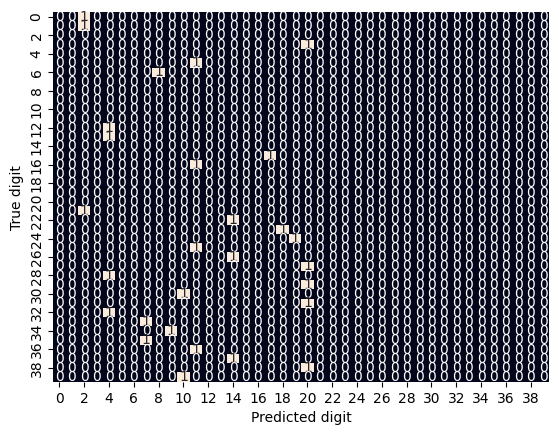

In [ ]:
yh_test = model.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, yh_test)
ax = sn.heatmap(cm, annot=True, cbar=False)
ax.set(ylabel="True digit", xlabel="Predicted digit")



In [ ]:
mape = mean_absolute_percentage_error(y_test, yh_test)
print(r2_score(y_test, yh_test))
print(sqrt(mse(y_test,yh_test)))
mape

-0.3091276481108156
306344.73496320867


4.842536579391977

[Text(50.722222222222214, 0.5, 'True digit'),
 Text(0.5, 23.52222222222222, 'Predicted digit')]

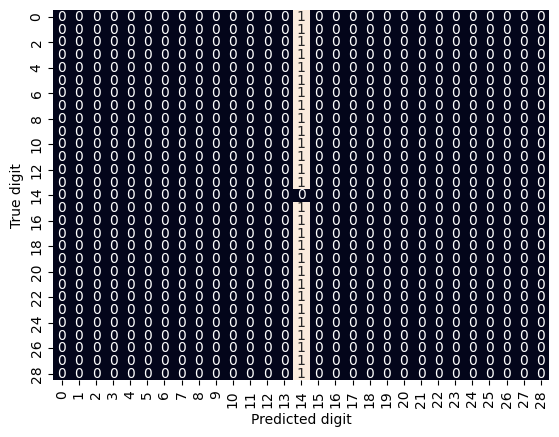

In [ ]:
model.partial_fit(x_train[y_train > 5], y_train[y_train > 5], update_classes=True)
yh2_test = model.predict(x_test)
cm2 = confusion_matrix(y_test, yh2_test)
ax = sn.heatmap(cm2, annot=True, cbar=False)
ax.set(ylabel="True digit", xlabel="Predicted digit")

In [ ]:
mape = mean_absolute_percentage_error(y_test, yh2_test)
print(r2_score(y_test, yh2_test))
print(sqrt(mse(y_test,yh2_test)))
mape

-0.03231392066681571
272035.3326933969


1.5547788444583905

In [ ]:
import numpy as np
from scipy.linalg import pinv, inv
import time

In [ ]:
class elm():
    '''
    Function: elm class init
    -------------------
    Parameters:
    shape: list, shape[hidden units, output units]
        numbers of hidden units and output units
    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'
        Activation function of neurals
    x: array, shape[samples, features]
        train data
    y: array, shape[samples, ]
        labels
    C: float
        regularization parameter
    elm_type: str, 'clf' or 'reg'
        'clf' means ELM solve classification problems, 'reg' means ELM solve regression problems.
    one_hot: bool, Ture or False, default True
        The parameter is useful only when elm_type == 'clf'. If the labels need to transformed to
        one_hot, this parameter is set to be True
    random_type: str, 'uniform' or 'normal', default:'normal'
        Weight initialization method
    '''
    def __init__(self, hidden_units, activation_function,  x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]
        self.beta = np.zeros((self.hidden_units, self.class_num))
        self.elm_type = elm_type
        self.one_hot = one_hot

        # if classification problem and one_hot == True
        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1/(1 + np.exp(- self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH))/(np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''
    def fit(self, algorithm):
        self.time1 = time.clock()   # compute running time
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y
        # no regularization
        if algorithm == 'no_re':
            self.beta = np.dot(pinv2(self.H.T), self.y_temp)
        # faster algorithm 1
        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.clock()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        if self.elm_type == 'clf':
            self.result = np.exp(self.result)/np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''
    def predict(self, x):
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''
    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct/y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])

        return self.test_score

In [ ]:
import elm

In [ ]:
model = elm.elm(hidden_units=32, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)

# test
prediction = model.predict(x_test)
print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

AttributeError: ignored